##  $1^{η}$ Εργαστηριακή Άσκηση Νευρωνικών Δικτύων και Ευφυών Υπολογιστικών Συστημάτων


###  Επιβλεπόμενη Μάθηση: Ταξινόμηση 

### Ομάδα 11 (Datasets U11	K07)
- Καράμπελα Θεοφανία ΑΜ: <font color='dodgerblue'>03117091</font>
- Τσακανίκα Χριστίνα ΑΜ: <font color='dodgerblue'>03117012</font>

### Μέρος 1. UCI  dataset 

### Σύντομη παρουσίαση του dataset

In [1]:
import sys
!{sys.executable} -m pip install scipy

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

You should consider upgrading via the 'c:\users\xrist\appdata\local\programs\python\python39-32\python.exe -m pip install --upgrade pip' command.


Eισαγωγή dataset

In [22]:
data = pd.read_csv("Quality Assessment - Digital Colposcopy/all.csv", skiprows=[99,197,290])

- To dataset αφορά τον υποκειμενικό ποιοτικό έλεγχο ψηφιακών κολποσκοπήσεων.

- Για το συγκεκριμένο dataset δεν χρειάστηκαν μετατροπές στα αρχεία plain text, παραμόνο να συνενώσουμε τα επιμέρους αρχεία .csv σε ένα ενιαίο.

- Συνολικά έχουμε:
   - _287 δείγματα_
   - _69 χαρακτηριστικά εκ των οποίων τα 62 ειναι χαρακτηριστικά πρόβλεψης και τα 7 ειναι target variables_
   - _Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά_

- Σε κάθε στήλη εμφανίζεται ως τίτλος το όνομα του χαρακτηριστικού. Οι γραμμές δεν ειναι αριθμημένες.

- Οι ετικέτες των κλάσεων αποτυπώνονται ως 0 και 1 και βρίσκονται στην τελευταία κολώνα με τίτλο consensus.

- Με την εντολή: 
"findstr "NaN" all.csv | find "NaN" /c" στο command line καθώς και " _print(data.isna().sum()) & print(data.isnull().sum())_" 
διαπιστώνουμε πως δεν υπάρχουν απουσιάζουσες τιμές.

- Το dataset αποτελείται από δύο κλάσεις 1 για το good και 0 για το bad. Για τα ποσοστά των δειγμάτων επί του συνόλου έχουμε ότι η κλάση 1 αποτελεί το 75.26% του συνόλου, ενώ η κλάση 0 αποτελεί το 24.74% αυτού. Εφόσον, η πρώτη κλάση εμφανίζεται τρεις φορές συχνότερα της δεύτερης, το dataset δεν είναι ισορροπημένο.  

In [23]:
zeros = data[data.consensus == 0].shape[0]
ones = data[data.consensus == 1].shape[0]
print("the percentage os zeros is: ", (zeros/(zeros+ones))*100, '%')
print("the percentage os ones is: ", (ones/(zeros+ones))*100, '%')
print("Ones are", ones/zeros, "times more than zeros")

the percentage os zeros is:  24.738675958188153 %
the percentage os ones is:  75.26132404181185 %
Ones are 3.0422535211267605 times more than zeros


### Προετοιμασία

Θέτουμε το _test_size = 0.3_ προκειμένου να εξασφαλίσουμε  test set ισο με το 30% των δειγμάτων. Δεν υπάρχουν απουσιάζουσες τιμές ούτε και κατηγορικά ή μη διατεταγμένα χαρακτηριστικά.

In [24]:
# Defining X and y (Features and Labels)
X = np.array(data.drop(["experts::0","experts::1","experts::2","experts::3","experts::4","experts::5","consensus"], axis = 1))
y = np.array(data["consensus"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Ταξινόμηση

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [26]:
def perform_cross_val(classifier, X, y):
    acc = cross_val_score(classifier, X, y, cv=10)
    f1 = cross_val_score(classifier, X, y, cv=10 , scoring='f1')
    print("The mean accuracy for "+ str(classifier)[:-2]+" is: ", acc.mean(), "\n", "The F1-score for "+ str(classifier)[:-2]+" is:", f1.mean(),  '\n')

### Eπίδοση οut-of-the-box

1.

In [27]:
import warnings
warnings.filterwarnings('ignore')

perform_cross_val(DummyClassifier(), X_train,y_train)
perform_cross_val(GaussianNB(), X_train,y_train)
perform_cross_val(KNeighborsClassifier(), X_train,y_train)
perform_cross_val(LogisticRegression(), X_train,y_train)

The mean accuracy for DummyClassifier is:  0.775 
 The F1-score for DummyClassifier is: 0.8730158730158729 

The mean accuracy for GaussianNB is:  0.755 
 The F1-score for GaussianNB is: 0.8383939192748817 

The mean accuracy for KNeighborsClassifier is:  0.78 
 The F1-score for KNeighborsClassifier is: 0.8699046133604957 

The mean accuracy for LogisticRegression is:  0.7750000000000001 
 The F1-score for LogisticRegression is: 0.8657151619200955 



| Classifier | Accuracy | F1-score |
| --- | --- | --- |
| Dummy | 0.775 | 0.873 |
| --- | --- | --- |
| Gaussian Naive Bayes | 0.755  | 0.838 |
| --- | --- | --- |
| K Neighbors | 0.780 | 0.870 |
| --- | --- | --- |
| Logistic Regression | 0.775 | 0.866 |

2.

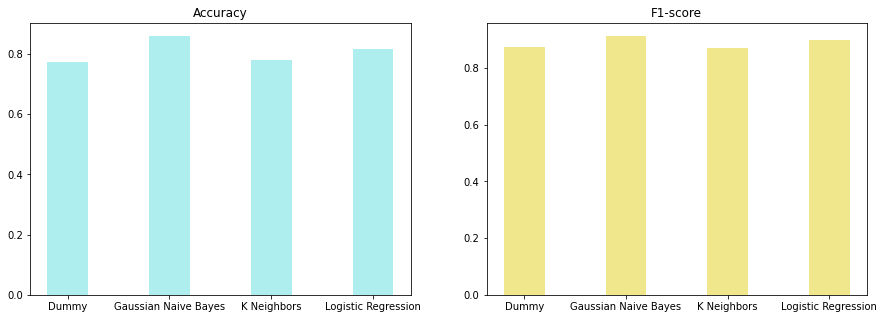

In [28]:
import matplotlib.pyplot as plt
 
res = {'Dummy':(0.775, 0.873), 'Gaussian Naive Bayes':(0.860, 0.913), 'K Neighbors':(0.780, 0.870),
        'Logistic Regression':(0.815, 0.898)}


classifiers = list(res.keys())
values = np.array(list(res.values()))
f1score = values[:,1]   
accur =  values[:,0]

#print(f1score, accur)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.set_title('Accuracy')
ax1.bar(classifiers, accur, color ='paleturquoise', width = 0.4)
ax2.set_title('F1-score')
ax2.bar(classifiers, f1score, color ='khaki',width = 0.4)

plt.show()

Σύμφωνα με τα παραπάνω, ο Gaussian classifier παρουσιάζει τις υψηλότερες επιδόσεις και στις δύο μετρικές. H υπόθεση πως τα χαρακτηριστικά κάθε δείγματος είναι ανεξάρτητα μεταξύ τους, επιταχύνουν το χρόνο υπολογισμού, σημειώνοντας υψηλή ακρίβεια. Στην προκειμένη περίπτωση, όπου ορισμένα χαρακτηριστικά παρουσίαζαν πράγματι ανεξαρτησία, ο αλγόριθμος καθίσταται επιπλέον αποδοτικός. Ακολουθεί ο Logistic Regression, K Neighbors και τέλος ο Dummy.
Παρατηρούμε επιπλέον, πως τα F1-scores ειναι υψηλότερα των αντίστοιχων accuracies, διότι η μετρική αυτή αποδίδει καλύτερα όταν το dataset ειναι imbalanced. Συγκεκριμένα, ο αρμονικός μέσος όρος των Precision και Recall μετριάζει τα δείγματα που δεν κατηγοριοποιήθηκαν σωστά.

### Βελτιστοποίηση

In [15]:
!pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)


You should consider upgrading via the 'c:\users\xrist\appdata\local\programs\python\python39-32\python.exe -m pip install --upgrade pip' command.


- Προεπεξεργασία

In [30]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


def perform_preprocessing(classifier, X_train,X_test, y_test, y_train):
        
    selector = VarianceThreshold()
    train_reduced = selector.fit_transform(X_train)
    #mask = selector.get_support()
    #y_reduced = y[:,mask]
    test_reduced = selector.transform(X_test)
    
    scaler = preprocessing.StandardScaler().fit(train_reduced)
    train_scaled = scaler.transform(train_reduced)
    test_scaled = scaler.transform(test_reduced)

    ros = RandomOverSampler()
    #print("the shapes are: ", train_scaled.shape,len(y_train))
    #mlb = MultiLabelBinarizer().fit(y)
    train_resampled, trainTargets_resampled = ros.fit_resample(train_scaled,y_train)

    n = 25
    pca = PCA(n_components=n)
    trainPCA = pca.fit_transform(train_resampled)
    testPCA = pca.transform(test_scaled)
    
    classifier.fit(trainPCA, trainTargets_resampled)
    preds = classifier.predict(testPCA)
    #print(len(y_test),len(preds))
    print(classification_report(y_test, preds))
    #return X_transformed
    acc = cross_val_score(classifier, trainPCA, trainTargets_resampled, cv=10)
    #acc = acc.mean()
    f1 = cross_val_score(classifier, trainPCA, trainTargets_resampled, cv=10 , scoring='f1')
    print("The mean accuracy for "+ str(classifier)[:-2]+" is: ", acc.mean(), "\n", "The F1-score for "+ str(classifier)[:-2]+" is:", f1.mean(),  '\n')

In [33]:
perform_preprocessing(DummyClassifier(), X_train,X_test, y_test, y_train)
perform_preprocessing(GaussianNB(), X_train,X_test, y_test, y_train)
perform_preprocessing(KNeighborsClassifier(), X_train,X_test, y_test, y_train)
perform_preprocessing(LogisticRegression(), X_train,X_test, y_test, y_train)

precision    recall  f1-score   support

         0.0       0.30      1.00      0.46        26
         1.0       0.00      0.00      0.00        61

    accuracy                           0.30        87
   macro avg       0.15      0.50      0.23        87
weighted avg       0.09      0.30      0.14        87

The mean accuracy for DummyClassifier is:  0.4838709677419356 
 The F1-score for DummyClassifier is: 0.32608695652173914 

              precision    recall  f1-score   support

         0.0       0.35      0.35      0.35        26
         1.0       0.72      0.72      0.72        61

    accuracy                           0.61        87
   macro avg       0.53      0.53      0.53        87
weighted avg       0.61      0.61      0.61        87

The mean accuracy for GaussianNB is:  0.7612903225806452 
 The F1-score for GaussianNB is: 0.8484651064726966 

              precision    recall  f1-score   support

         0.0       0.38      0.35      0.36        26
         1.0    

- Pipeline

In [34]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA   

def define_pipeline(classifier,X,y):
    selector = VarianceThreshold()
    scaler = StandardScaler()
    ros = RandomOverSampler()
    pca = PCA()
    pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('classifier', classifier)])
    
    acc = cross_val_score(classifier, X, y, cv=10) #X_train, y_train
    f1 = cross_val_score(classifier, X, y, cv=10 , scoring='f1') #X_train, y_train
    print("The mean accuracy for "+ str(classifier)[:-2]+" is: ", acc.mean(), "\n", "The F1-score for "+ str(classifier)[:-2]+" is:", f1.mean(),  '\n') 
    
    return selector, scaler, ros, pca, pipe

In [36]:
define_pipeline(DummyClassifier(), X_train,y_train)
define_pipeline(GaussianNB(), X_train,y_train)
define_pipeline(KNeighborsClassifier(), X_train,y_train)
define_pipeline(LogisticRegression(), X_train,y_train)

The mean accuracy for DummyClassifier is:  0.775 
 The F1-score for DummyClassifier is: 0.8730158730158729 

The mean accuracy for GaussianNB is:  0.785 
 The F1-score for GaussianNB is: 0.8583939192748817 

The mean accuracy for KNeighborsClassifier is:  0.815 
 The F1-score for KNeighborsClassifier is: 0.8699046133604957 

The mean accuracy for LogisticRegression is:  0.7780000000000001 
 The F1-score for LogisticRegression is: 0.8657151619200955 



- Eύρεση βέλτιστων υπερμαραμέτρων με grid search & cross validation

Aρχικά με την εντολή "print(np.max(X_train.var(axis=0)))" ελέγχουμε που κυμαίνεται η διακύμανση των train δεδομένων, προκειμένου να καθορίσουμε στην συνέχεια τον variance threshold πίνακα. Παρακάτω, παρουσιάζονται τα scores και οι καλύτερες παράμετροι για κάθε μετρική και κάθε μοντέλο αντίστοιχα.

In [44]:
DummyClassifier().get_params()
from sklearn.model_selection import GridSearchCV

vthreshold = [0,1,10,20,30,50,80,90, 100,200, 300, 400, 500, 600, 700, 800,900, 1000, 1100, 1200, 1300] 
n_components = [10, 11,12,13,14,15,16,17, 23,24,25,26,27,28]

selector, scaler, ros, pca, _ = define_pipeline(DummyClassifier(), X_train,y_train)

dummy_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', DummyClassifier())], memory = 'tmp')
dummy_param_grid = dict(selector__threshold=vthreshold, pca__n_components=n_components, dummy__strategy=["stratified", "most_frequent", "prior", "uniform", "constant"])

dummy_grid_acc = GridSearchCV(dummy_pipe, dummy_param_grid, cv=10, scoring='accuracy').fit(X_train, y_train)
dummy_grid_f1 = GridSearchCV(dummy_pipe, dummy_param_grid, cv=10, scoring='f1').fit(X_train, y_train)

print(dummy_grid_acc.best_score_)
print(dummy_grid_acc.best_params_)

print(dummy_grid_f1.best_score_)
print(dummy_grid_f1.best_params_)


0.795
{'dummy__strategy': 'stratified', 'pca__n_components': 14, 'selector__threshold': 1200}
0.892630485733934
{'dummy__strategy': 'uniform', 'pca__n_components': 10, 'selector__threshold': 700}


In [42]:
GaussianNB().get_params()
from sklearn.model_selection import GridSearchCV

vthreshold = [0,1,10,20,30,50,80,90, 100,200, 300, 400, 500, 600, 700, 800,900, 1000, 1100, 1200, 1300] 
n_components = [10, 11,12,13,14,15,16,17, 23,24,25,26,27,28]

selector, scaler, ros, pca, _ = define_pipeline(GaussianNB(), X_train,y_train)

gaussian_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gaussian', GaussianNB())], memory = 'tmp')
gaussian_param_grid = dict( selector__threshold=vthreshold, pca__n_components=n_components, gaussian__var_smoothing=[1e-09,1e-08,1e-10,1e-11])

gaussian_grid_acc = GridSearchCV(gaussian_pipe, gaussian_param_grid, cv=10, scoring='accuracy').fit(X_train, y_train)
gaussian_grid_f1 = GridSearchCV(gaussian_pipe, gaussian_param_grid, cv=10, scoring='f1').fit(X_train, y_train)

print(gaussian_grid_acc.best_score_)
print(gaussian_grid_acc.best_params_)

print(gaussian_grid_f1.best_score_)
print(gaussian_grid_f1.best_params_)


0.799
{'gaussian__var_smoothing': 1e-09, 'pca__n_components': 14, 'selector__threshold': 0}
0.8792332431225318
{'gaussian__var_smoothing': 1e-09, 'pca__n_components': 14, 'selector__threshold': 0}


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

vthreshold = [0,1,10,20,30,50,80,90, 100,200, 300, 400, 500, 600, 700, 800,900, 1000, 1100, 1200, 1300] 
n_components = [10, 11,12,13,14,15,16,17, 23,24,25,26,27,28]

selector, scaler, ros, pca, _ = define_pipeline(KNeighborsClassifier(), X_train,y_train)

neighbors_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('neighbors', KNeighborsClassifier())], memory = 'tmp')
neighbors_param_grid = dict( selector__threshold=vthreshold, pca__n_components=n_components, neighbors__n_neighbors=list(range(1, 31)), neighbors__weights=['uniform', 'distance'])

neighbors_grid_acc = GridSearchCV(neighbors_pipe, neighbors_param_grid, cv=10, scoring='accuracy').fit(X_train, y_train)
neighbors_grid_f1 = GridSearchCV(neighbors_pipe, neighbors_param_grid, cv=10, scoring='f1').fit(X_train, y_train)

print(neighbors_grid_acc.best_score_)
print(neighbors_grid_acc.best_params_)

print(neighbors_grid_f1.best_score_)
print(neighbors_grid_f1.best_params_)

0.822
{'neighbors__n_neighbors': 29, 'neighbors__weights': 'uniform', 'pca__n_components': 17, 'selector__threshold': 0}
0.8657122013028085
{'neighbors__n_neighbors': 30, 'neighbors__weights': 'distance', 'pca__n_components': 16, 'selector__threshold': 0}


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

vthreshold = [-500,-100,-90,-1,0,1] 
n_components = [1,2,5,9,10,11,12,13,14,20]

selector, scaler, ros, pca, _ = define_pipeline(LogisticRegression(), X_train,y_train)

logistic_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('logistic', LogisticRegression())], memory = 'tmp')
logistic_param_grid = dict( selector__threshold=vthreshold, pca__n_components=n_components, logistic__C = [0.0001,0.001,0.1,1.0, 10.0, 100.0, 1000.0], logistic__class_weight = ["balanced","None"],
                           logistic__penalty=["l1","l2","none","elasticnet"],logistic__tol = [1e-19,1e-18,1e-17,1e-16,1e-15])

logistic_grid_acc = GridSearchCV(logistic_pipe, logistic_param_grid, cv=10, scoring='accuracy').fit(X_train, y_train)
logistic_grid_f1 = GridSearchCV(logistic_pipe, logistic_param_grid, cv=10, scoring='f1').fit(X_train, y_train)

print(logistic_grid_acc.best_score_)
print(logistic_grid_acc.best_params_)

print(logistic_grid_f1.best_score_)
print(logistic_grid_f1.best_params_)



0.7950000000000001
{'logistic__C': 0.1, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l2', 'logistic__tol': 1e-19, 'pca__n_components': 20, 'selector__threshold': 0}
0.8887234687526572
{'logistic__C': 0.1, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l2', 'logistic__tol': 1e-19, 'pca__n_components': 20, 'selector__threshold': 0}


Eκπαιδεύουμε το καλύτερο μοντέλο κάθε ταξινομητή, στο σύνολο του train set και εκτιμούμε την επίδοσή του στο test set.

In [47]:
import time
#uniform', 'pca__n_components': 24, 'selector__threshold': 500
def best_model(n_components,threshold, classifier):
    selector = VarianceThreshold(threshold)
    scaler = StandardScaler()
    ros = RandomOverSampler()
    pca = PCA(n_components)
    pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('classifier', classifier)])
    return pipe

t0=time.time()
best_dummy = best_model(n_components = 14,threshold=1200, classifier = DummyClassifier(strategy = 'stratified'))
best_dummy.fit(X_train,y_train)
print("Dummy Classifier Training time:", round(time.time()-t0, 3))
t1=time.time()
print("Best Dummy Classifier model accuracy: ", best_dummy.score(X_test,y_test))
print("Dummy Classifier Test time:", round(time.time()-t1, 3))
print('\n')

#{'gaussian__var_smoothing': 1e-09, 'pca__n_components': 13, 'selector__threshold': 0}
t2=time.time()
best_gaussian = best_model(n_components = 14,threshold=0, classifier = GaussianNB(var_smoothing = 1e-09))
best_gaussian.fit(X_train,y_train)
print("Guassian Classifier Training time:", round(time.time()-t2, 3))
t3=time.time()
print("Best Gaussian Naive Bayes Classifier model accuracy: ",best_gaussian.score(X_test,y_test))
print("Gaussian Classifier Test time:", round(time.time()-t3, 3))
print('\n')

#neighbors__n_neighbors': 1, 'neighbors__weights': 'uniform', 'pca__n_components': 9,'selector__threshold': 0} 0.
t4=time.time()
best_neighbors = best_model(n_components = 17,threshold=0, classifier = KNeighborsClassifier(n_neighbors=29,weights='uniform' ))
best_neighbors.fit(X_train,y_train)
print("K Neighbors Classifier Training time:", round(time.time()-t4, 3))
t5=time.time()
print("Best K Neighbors Classifier model accuracy: ",best_neighbors.score(X_test,y_test))
print("K Neighbors Classifier Test time:", round(time.time()-t5, 3))
print('\n')

#logistic__C': 1.0, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l2', 'logistic__tol': 1e-19, 'pca__n_components': 14
t6=time.time()
best_logistic =  best_model(n_components = 20,threshold=0, classifier = LogisticRegression(C=1.0, class_weight='balanced', penalty='l2', tol=1e-19 ))
best_logistic.fit(X_train,y_train)
print("Logistic Classifier Training time:", round(time.time()-t6, 3))
t7=time.time()
print("Best Logistic Regression model accuracy: ", best_logistic.score(X_test,y_test))
print("Logistic Classifier Test time:", round(time.time()-t7, 3))

Dummy Classifier Training time: 0.01
Best Dummy Classifier model accuracy:  0.47126436781609193
Dummy Classifier Test time: 0.001


Guassian Classifier Training time: 0.014
Best Gaussian Naive Bayes Classifier model accuracy:  0.7011494252873564
Gaussian Classifier Test time: 0.008


K Neighbors Classifier Training time: 0.008
Best K Neighbors Classifier model accuracy:  0.7471264367816092
K Neighbors Classifier Test time: 0.008


Logistic Classifier Training time: 0.024
Best Logistic Regression model accuracy:  0.6781609195402298
Logistic Classifier Test time: 0.0


### Aποτελέσματα και συμπεράσματα

1.

| Classifier | Accuracy | F1-score | otb Accuracy |otb F1-score |Train Time | Test Time |Accuracy in test set|
| --- | --- | --- |--- | --- |--- | --- |--- |
| Dummy | 0.795 | 0.893 | +0.002| +0.002 |0.010 | 0.001 |0.471 |
| --- | --- | --- |--- | --- |--- | --- |--- |
| Gaussian Naive Bayes | 0.799 | 0.879 |+0.044 |+0.041 |0.014| 0.008 |0.701 |
| --- | --- | --- |--- | --- |--- | --- |--- |
| K Neighbors | 0.822 | 0.866 |+0.0800 | +0.042 |-0.004 | 0.008 |0.747 |
| --- | --- | --- |--- | --- |--- | --- |--- |
| Logistic Regression | 0.795 | 0.889 |+0.020 |+0.023 |0.024 | 0.008 |0.678 |

<br>
otb Accuracy:  Η διαφορά συγκριτικά με το οut of the box μοντέλο, κατά τη μετρική  accuracy.
<br>
otb F1-score : H διαφορά συγκριτικά με το out of the box μοντέλο, κατά τη μετρική F1-score.


2. Bar plot σύγκρισης

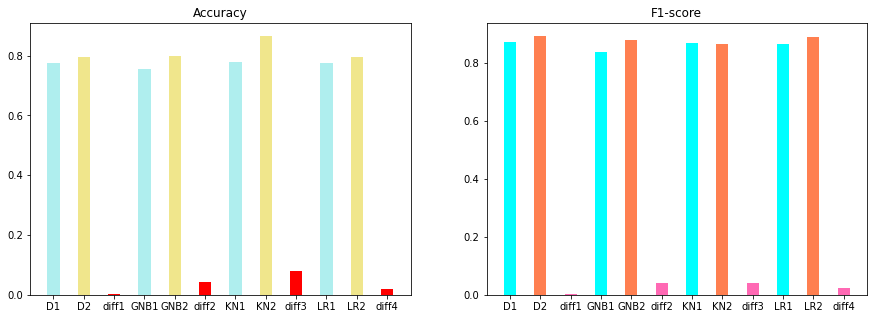

In [48]:
colors1 = ['paleturquoise','khaki','red' ]
colors2 = ['cyan','coral','hotpink' ]

res1 = {'D1':(0.775),'D2':(0.795),"diff1":(0.002), 'GNB1':(0.755),'GNB2':(0.799), 
        "diff2":(0.044),'KN1':(0.7800),'KN2':(0.866),"diff3":(0.0800),
        'LR1':(0.775),'LR2':(0.795),"diff4":(0.020)}
        
res2 = {'D1':(0.873),'D2':(0.893), "diff1":(0.002),
        'GNB1':(0.838),'GNB2':(0.879),"diff2":(0.041),
        'KN1':(0.870),'KN2':(0.866),"diff3":(0.042),
        'LR1':(0.866),'LR2':(0.889),"diff4":(0.023)}

classifiers1 = list(res1.keys())
values1 = np.array(list(res1.values()))
values2 = np.array(list(res2.values()))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.set_title('Accuracy')
ax1.bar(classifiers1, values1, color=colors1, width = 0.4)
ax2.set_title('F1-score')
ax2.bar(classifiers1, values2, color =colors2,width = 0.4)
plt.show()

Ο δείκτης 1 αποδίδεται στους ταξινομητές out of the box, ενώ ο δείκτης 2 στους βελτιστοποιημένους. Με diff συμβολίζουμε την διαφορά στην επίδοση για κάθε ζεύγος ταξινομητών. Όπως ήταν αναμενόμενο, οι ταξινομητές έπειτα απο τη βελτιστοποίηση σημειώνουν πολύ υψηλές αποδόσεις, υψηλότερες από αυτές των out of the box και για τις δύο μετρικές. Πιο συγκεκριμένα, ο ταξινομητής K Neighbors είναι αυτός με το υηλότερο score καθώς και αυτός που εμφανίζει τη μεγαλύτερη διαφορά από την out of the box εκδοχή του. Ο ταξινομητής αυτός παρουσίαζε τις περισσότερες παραμέτρους, συνεπώς εξετάστηκε για ένα ευρή πεδίο ορισμού αυτών καταλήγοντας στο βέλτιστο δυνδυασμό παραμέτρων που άγγιξε accuracy 82.2%

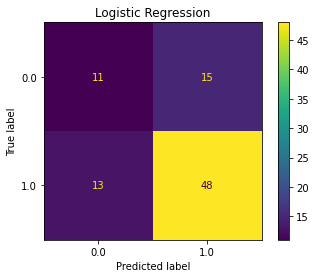

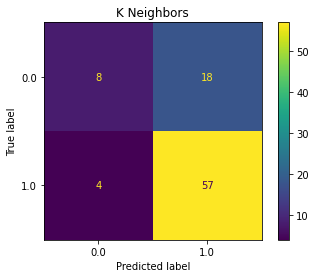

In [49]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt 

#worst classifier: Logistic Regression
y1_pred = best_logistic.predict(X_test)
M1 = confusion_matrix(y_test, y1_pred)
plot_confusion_matrix(best_logistic, X_test, y_test)
plt.title("Logistic Regression")
plt.show()

#best classifier (except from dummy):
y2_pred = best_neighbors.predict(X_test)
M2 = confusion_matrix(y_test, y2_pred)
plot_confusion_matrix(best_neighbors, X_test, y_test)
plt.title("K Neighbors")
plt.show()

Εξετάζοντας τα παραπάνω διαγράμματα διαπιστώνουμε πως ο ταξινομητης Logistic Regression προβλέπει λάθος μόλις 28 δείγματα του τέστ set, εν αντιθέσει του K Neighbors ο οποίος προβλέπει λάθος στο σύνολο 22 δείγματα.
<br>
Κατά συνέπεια, ο καλύτερος ταξινομητής για το συγκεκριμένο πρόβλημα είναι ο K Neighbors. Ο Logistic Regression μπορεί να έχει  περισσότερες παραμέτερους οι οποίοι του δίνουν τη δυνατότητα να σημειώσει υψηλότερα score σε κάθε μετρική, ωστόσο αυτό δεν εγγυάται ότι θα σημειώσει τη βέλτιστη επίδοση.

### Μέρος 2. Kaggle dataset

### Επισκόπηση

- Το dataset Dry-Bean, περιέχει 13,611 δείγματα φασολιών, 7 διαφορετικών κατηγοριών, 7 το σύνολο δηλαδή κλάσεων, για τα οποία λαμβάνουμε μετρήσεις για 16 διαφορετικά στοιχεία (16 features). Tα δείγματα των φασολιών είναι 12διάστατα με 4 shape forms. Στόχος είναι η βέλτιστη κατηγοριοποίηση των δειγμάτων των φασολιών, στις 7 κατηγορίες με την χρήση των ταξινομητών:
<br>
    - Multi-Layer Perceptron (MLP) 
<br>
    - Support Vector Machines (SVM).

- Σε κάθε στήλη εμφανίζεται ως τίτλος το όνομα του χαρακτηριστικού. Οι γραμμές δεν ειναι αριθμημένες.

- Οι ετικέτες των κλάσεων αποτυπώνονται ως strings με τα ονόματα των φασολιών και βρίσκονται στην τελευταία κολώνα με τίτλο consensus. Φροντίζουμε να μετατρέψουμε το κάθε string σε ένα ξεχωριστό αριθμό από το 0 έως και το 6.

- Ούτε στο δεδομένο dataset υπάρχουν απουσιάζουσες τιμές. Παρακάτω, βάσει των περιγραφών του Kaggle, καθώς και τους δεδομένους βοηθητικούς κώδικες, κατανοούμε καλύτερα το dataset.

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [53]:
SOURCE = "Dry_Bean.csv"
CLASSES = np.array(["SEKER","BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SIRA"])
data = pd.read_csv(SOURCE)

In [4]:
#Display first 5 lines of the Dataset
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
def findInstances(beans,classes):
    instanceCount = dict()
    for beanClass in CLASSES:
        numinstances = beans.Class.value_counts()[beanClass]
        instanceCount[beanClass] = numinstances
        print(f"There are {numinstances} instances for class: {beanClass}")

    minInstance = min(instanceCount, key=instanceCount.get)

    print(f"\nThe class of beans with the least amount of instances is: {minInstance}")
    
    
findInstances(data,CLASSES)

There are 2027 instances for class: SEKER
There are 1322 instances for class: BARBUNYA
There are 522 instances for class: BOMBAY
There are 1630 instances for class: CALI
There are 3546 instances for class: DERMASON
There are 1928 instances for class: HOROZ
There are 2636 instances for class: SIRA

The class of beans with the least amount of instances is: BOMBAY


### Μετρικές

Είθισται η μετρική accuracy να χρησιμοποιείται όταν το dataset περιέχει περίπου ίσο αριθμό δειγμάτων για κάθε κατηγορία, ενώ αποφεύγεται όταν μία κλάση έχει σημαντικά περισσότερα δείγματα από τις υπόλοιπες. 
<br>
Από την άλλη, η μετρική f1-score χρησιμοποιείται όταν οι False Negatives και False Positives προβλέψεις είναι αρκετές και όταν τα δείγματα κάθε κλάσης δεν είναι ισοκατανεμημένα.
<br>
Από τα παραπάνω αποτελέσματα διαπιστώνουμε ότι η κλάση DERMASON έχει σημαντικά περισσότερα δείγματα από τις υπόλοιπες 6, ενώ η κλάση BOMBAY διαθέτει τα λιγότερα δείγματα. 
<br>
Οι μετρικές που θα επιλέξουμε είναι accuracy και f1-score, προκειμένου να καταλήξουμε στις παραπάνω διαπιστώσεις.

### Train-test split και σχήμα CV

Παρακάτω, χωρίζουμε τα δεδομένα μας σε train και test, ενώ συμβολίζουμε την κάθε κλάση με έναν αριθμό από το 0 μέχρι και το 6. Και σε αυτό το dataset, για την αξιολόγηση χρησιμοποιούμε το σχήμα διασταυρούμενης επικύρωσης, επιλέγοντας το 20% των δεδομένων να αποτελεί το test set. 
<br>
Eπιλέγουμε αυτό το ποσοστό διαμοιρασμού, καθώς πλέον οι κλάσεις μας είναι αρκετές και προκειμένου το μοντέλο μας να εκπαιδευτεί καλά σε κάθε μία από αυτές, απαιτούνται περισσότερα δείγματα εκπαίδευσης. Με αυτόν τον τρόπο, το μοντέλο μας αποκτά τη δυνατότητα της γενίκευσης.
<br>
Eπιπλέον, εφαρμόζουμε StandardScaler στα δεδομένα μας, αφαιρούμε δηλαδή από το χαρακτηριστικό τον μέσο όρο του και κάνουμε scaling κάθε χαρακτηριστικό στην μοναδιαία διακύμανση για την επίτευξη καλύτερων προβλέψεων.

In [54]:
from sklearn.model_selection import train_test_split#Preprocessing Data for Training
from sklearn.preprocessing import StandardScaler

# Using train_test_split 
dataAttributes = data.drop("Class",axis=1)
dataClasses = data[["Class"]]

#print(data.head())
# setting random_state to 0 for reproducable results
x_train, x_test, y_train, y_test = train_test_split(dataAttributes,dataClasses, test_size = 0.2, train_size=0.8, random_state=0)

# Implementing StandardScaler feature scaling
X_train = StandardScaler().fit_transform(x_train)
X_test = StandardScaler().fit_transform(x_test)

#give number to each class
d = dict(zip(CLASSES, range(0,7)))
y_test = y_test['Class'].map(d, na_action='ignore')
y_train = y_train['Class'].map(d, na_action='ignore')

y_train =  np.ravel(y_train)
y_test = np.ravel(y_test)

X = np.append(X_train, X_test).reshape(13611,16)
y = np.append(y_train, y_test)


### Επίδοση out-of-the-box


In [55]:
def perform_cross_val(classifier, X, y):
    
    acc = cross_val_score(classifier, X, y, cv=10)
    f1 = cross_val_score(classifier, X, y, cv=10 , scoring='f1_weighted')
    print("The mean accuracy for "+ str(classifier)[:-2]+" is: ", acc.mean(), "\n", "The F1-score for "+ str(classifier)[:-2]+" is:", f1.mean(),  '\n')


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

mlp = MLPClassifier()
svm = svm.SVC()
perform_cross_val(mlp, X_train, y_train)
perform_cross_val(svm, X_train, y_train)
dummy = DummyClassifier()
perform_cross_val(dummy, X_train, y_train)

The mean accuracy for MLPClassifier is:  0.931667358747907 
 The F1-score for MLPClassifier is: 0.9316185179559693 

The mean accuracy for SVC is:  0.9274430467779398 
 The F1-score for SVC is: 0.9274685990536279 
 
The mean accuracy for DummyClassifier is:  0.17000528344946791 
 The F1-score for DummyClassifier is: 0.170905037928529 


1.

| Classifier | Accuracy | F1-score |
| --- | --- | --- |
| Dummy | 0.1673 |0.1736 |
| --- | --- | --- |
| MLP | 0.9317 | 0.9316 |
| --- | --- | --- |
| SVM |0.9274| 0.9275 |

2.

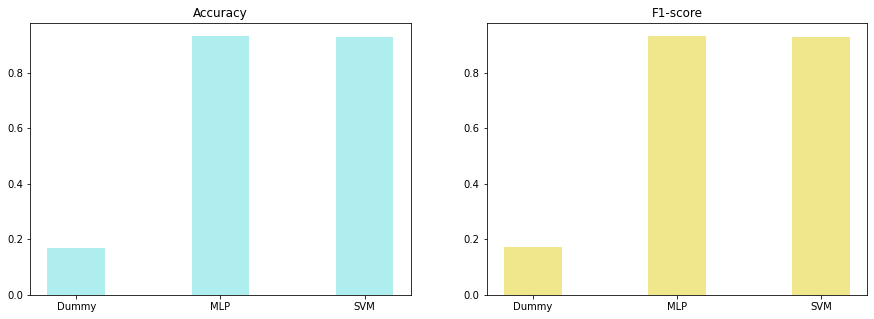

In [9]:
import matplotlib.pyplot as plt
 
res = {'Dummy':(0.1673, 0.1736), 'MLP':(0.9317, 0.9316), 'SVM':(0.9274, 0.9275)}


classifiers = list(res.keys())
values = np.array(list(res.values()))
f1score = values[:,1]   
accur =  values[:,0]

#print(f1score, accur)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.set_title('Accuracy')
ax1.bar(classifiers, accur, color ='paleturquoise', width = 0.4)
ax2.set_title('F1-score')
ax2.bar(classifiers, f1score, color ='khaki',width = 0.4)

plt.show()

O Dummy Classifier αποδίδει πενιχρά και στις 2 μερτρικές. Πλέον, το dataset είναι σημαντικά μεγαλύτερο από αυτό του UCI και τα προβλήματα πιο σύνθετα (από binary classification μεταβήκαμε σε 7 διαφορετικές κλάσεις). Ο Dummy Classifier δεν χρησιμοποιείται σε πραγματικά προβλήματα. Τον αξιοποιούμε αποκλειστικά ως baseline, συγκρίνοντας την επίδοσή του με πραγματικούς classifiers.
<br>
Tοσο ο SVM όσο και ο MLP αποδίδουν άριστα στο dataset, με τον MLP να σημειώνει ελάχιστα καλύτερες επιδόσεις. Αυτό οφείλεται στην πληθώρα υπερπαραμέτρων που διαθέτει ο MLP καθιστώντας τον ιδιαίτερα πιο σύνθετο και χρονοβόρο στην εξαγωγή αποτελεσμάτων.
<br>
Tέλος, οι επιδόσεις και στις δύο μετρικές διαφέρουν ελάχιστα (τέταρτο δεκαδικό ψηφίο).

### Bελτιστοποίηση

- Προεπεξεργασία

In [10]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


def perform_preprocessing(classifier, X_train,X_test, y_test, y_train):
        
    selector = VarianceThreshold()
    train_reduced = selector.fit_transform(X_train)
    test_reduced = selector.transform(X_test)
    
    scaler = preprocessing.StandardScaler().fit(train_reduced)
    train_scaled = scaler.transform(train_reduced)
    test_scaled = scaler.transform(test_reduced)

    ros = RandomOverSampler()
    train_resampled, trainTargets_resampled = ros.fit_resample(train_scaled,y_train)

    n = 3
    pca = PCA(n_components=n)
    trainPCA = pca.fit_transform(train_resampled)
    testPCA = pca.transform(test_scaled)
    
    classifier.fit(trainPCA, trainTargets_resampled)
    preds = classifier.predict(testPCA)
    print(classification_report(y_test, preds))
    acc = cross_val_score(classifier, trainPCA, trainTargets_resampled, cv=10)
    f1 = cross_val_score(classifier, trainPCA, trainTargets_resampled, cv=10 , scoring='f1_weighted')
    print("The mean accuracy for "+ str(classifier)[:-2]+" is: ", acc.mean(), "\n", "The F1-score for "+ str(classifier)[:-2]+" is:", f1.mean(),  '\n')

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

mlp = MLPClassifier()
svm = svm.SVC(decision_function_shape='ovo', random_state = 0)

perform_preprocessing(mlp, X_train,X_test, y_test, y_train)
perform_preprocessing(svm, X_train,X_test, y_test, y_train)

The mean accuracy for MLPClassifier is: 0.9447075423347014 
 The F1-score for MLPClassifier is: 0.9439206692415949 
The mean accuracy for SVC is: 0.8853995912226535
 The F1-score for SVC is: 0.8854763971388635  


- Pipelines

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA   

def define_pipeline(classifier,X,y):
    selector = VarianceThreshold()
    scaler = StandardScaler()
    ros = RandomOverSampler()
    pca = PCA()
    pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('classifier', classifier)])
    
    acc = cross_val_score(classifier, X_train, y_train, cv=10) #X_train, y_train
    f1 = cross_val_score(classifier, X_train, y_train, cv=10 , scoring='f1_weighted') #X_train, y_train
    print("The mean accuracy for "+ str(classifier)[:-2]+" is: ", acc.mean(), "\n", "The F1-score for "+ str(classifier)[:-2]+" is:", f1.mean(),  '\n') 
    
    return selector, scaler, ros, pca, pipe

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

mlp = MLPClassifier()
svm = svm.SVC(decision_function_shape='ovo', random_state = 0)

mlp_selector, mlp_scaler, mlp_ros, mlp_pca, _  = define_pipeline(mlp, X_train,y_train)
svm_selector, svm_scaler, svm_ros, svm_pca, _ = define_pipeline(svm, X_train,y_train)

The mean accuracy for MLPClassifier is:  0.9276261951061416 
 The F1-score for MLPClassifier: 0.9273405932532123 

The mean accuracy for SVC is:  0.8395482228704154 
 The F1-score for SVC is: 0.8331446064570285 


- Εύρεση βέλτιστων υπερμαραμέτρων με grid search & cross validation

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

mlp = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [14]:
acc = cross_val_score(MLPClassifier(activation = 'relu', alpha = 0.05, hidden_layer_sizes =  (50, 100, 50),learning_rate = 'constant', solver='adam'), X_train, y_train, cv=10) 
f1 = cross_val_score(MLPClassifier(activation = 'relu', alpha = 0.05, hidden_layer_sizes =  (50, 100, 50),learning_rate = 'constant', solver='adam'), X_train, y_train, cv=10 , scoring='f1_weighted') 
print("The mean accuracy for MLP is: ", acc.mean(), "\n", "The F1-score for MLP is:", f1.mean(),  '\n') 

The mean accuracy for MLP is:  0.930289526278831 
 The F1-score for MLP is: 0.930598425804598 


In [61]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVC(), param_grid, n_jobs=-1, cv=10)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.1, max_iter=20)


In [16]:
acc = cross_val_score(svm.SVC(C=0.1, gamma=0.1, kernel='rbf'), X_train, y_train, cv=10) 
f1 = cross_val_score(svm.SVC(C=0.1, gamma=0.1, kernel='rbf'), X_train, y_train, cv=10 , scoring='f1_weighted') 
print("The mean accuracy for SVM is: ", acc.mean(), "\n", "The F1-score for SVM is:", f1.mean(),  '\n') 

The mean accuracy for SVM is:  0.9530344048776538 
 The F1-score for SVM is: 0.9731495586552845 


In [58]:
!pip install -U imbalanced-learn
!pip install optuna

You should consider upgrading via the 'c:\users\xrist\appdata\local\programs\python\python39-32\python.exe -m pip install --upgrade pip' command.


  Using cached optuna-2.10.0-py3-none-any.whl (308 kB)
  Using cached cmaes-0.8.2-py3-none-any.whl (15 kB)
  Using cached alembic-1.7.5-py3-none-any.whl (209 kB)
  Using cached autopage-0.4.0-py3-none-any.whl (20 kB)
  Using cached pbr-5.8.0-py2.py3-none-any.whl (112 kB)
  Using cached prettytable-2.4.0-py3-none-any.whl (24 kB)
  Using cached pyperclip-1.8.2.tar.gz (20 kB)
  Using cached stevedore-3.5.0-py3-none-any.whl (49 kB)
  Using cached colorlog-6.6.0-py2.py3-none-any.whl (11 kB)
  Using cached Mako-1.1.6-py2.py3-none-any.whl (75 kB)
  Using cached pyreadline3-3.3-py3-none-any.whl (95 kB)
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11112 sha256=79397374e3014c31b377728830dc8fd302d9ad03bd44c6ec2720fd923f139c9a
  Stored in directory: c:\users\xrist\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built pyperclip


You should consider upgrading via the 'c:\users\xrist\appdata\local\programs\python\python39-32\python.exe -m pip install --upgrade pip' command.


In [59]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm

def objective(trial):
    
    
    # Load data
    dataAttributes = data.drop("Class",axis=1)
    dataClasses = data[["Class"]]
    
    # setting random_state to 0 for reproducable results
    x_train, x_test, y_train, y_test = train_test_split(dataAttributes,dataClasses, test_size = 0.2, train_size=0.8, random_state=0)
    
    
    # Implementing StandardScaler feature scaling
    X_train = StandardScaler().fit_transform(x_train)
    X_test = StandardScaler().fit_transform(x_test)

    d = dict(zip(CLASSES, range(0,7)))
    y_test = y_test['Class'].map(d, na_action='ignore')
    y_train = y_train['Class'].map(d, na_action='ignore')

    y_train =  np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    X = np.append(X_train, X_test).reshape(13611,16)
    y = np.append(y_train, y_test)

    # Sample hyper parameters
    classifier_name = trial.suggest_categorical("classifier", ["MLPClassifier",
                                                               "SVC"])
    if classifier_name=="MLPClassifier":

        # Sample hyper parameters
        activation = trial.suggest_categorical('activation', ["identity", "logistic", "tanh", "relu"])
        solver = trial.suggest_categorical("solver", 
                                              ["sgd", "adam"])
        tol = trial.suggest_int('tol', 1e-8,1e-1, 1e-7)
        learning_rate = trial.suggest_categorical('learning_rate', 
                                           ["constant","invscaling"])
        # Construct the model
        clf = MLPClassifier(activation=activation,
                               solver=solver,
                               tol=tol,
                               learning_rate=learning_rate
                               
                               )
    elif classifier_name=="SVC":

        # Sample hyper parameters
        C = trial.suggest_loguniform('C', 1e-10, 1)
        kernel = trial.suggest_categorical('kernel',['poly','rbf','sigmoid'])
        degree = trial.suggest_int('degree',1, 50)
        gamma = trial.suggest_loguniform('gamma',0.001,10000)

        # Construct the model
        clf = SVC(C=C, kernel=kernel, degree=degree,gamma=gamma)
    
    # Train the model
    clf.fit(X_train,y_train)

    # Evaluate the model
    y_pred_test = clf.predict(X_test)
    loss = mean_squared_error(y_test,y_pred_test)

    print("Test Score:",clf.score(X_test,y_test))
    print("Train Score:",clf.score(X_train,y_train))
    
    print("\n=================")
    return loss

In [60]:
import optuna
import warnings
warnings.filterwarnings('ignore')

# depending on the definition of objective
# we can create study object with either minimize or maximize
study = optuna.create_study(direction='minimize')

# start tuning for the hyper-parameters
study.optimize(objective, n_trials=100)

[I 2021-11-28 04:26:16,810] A new study created in memory with name: no-name-4af72568-7be0-4795-8786-e1a78705d967
[I 2021-11-28 04:26:18,720] Trial 0 finished with value: 1.5600440690414983 and parameters: {'classifier': 'MLPClassifier', 'activation': 'logistic', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 0 with value: 1.5600440690414983.


Test Score: 0.757253029746603
Train Score: 0.7341109478324761



[I 2021-11-28 04:26:19,055] Trial 1 finished with value: 9.473007712082262 and parameters: {'classifier': 'SVC', 'C': 2.0217718263421177e-10, 'kernel': 'poly', 'degree': 22, 'gamma': 1.2029913721913787}. Best is trial 0 with value: 1.5600440690414983.


Test Score: 0.23466764597869996
Train Score: 0.23218221895664953

Test Score: 0.51120088138083


[I 2021-11-28 04:26:20,434] Trial 2 finished with value: 6.514873301505692 and parameters: {'classifier': 'SVC', 'C': 4.9898075934414093e-05, 'kernel': 'sigmoid', 'degree': 17, 'gamma': 0.4536479747508731}. Best is trial 0 with value: 1.5600440690414983.


Train Score: 0.4829169728141073

Test Score: 0.5993389643775248


[I 2021-11-28 04:26:21,745] Trial 3 finished with value: 6.215938303341902 and parameters: {'classifier': 'SVC', 'C': 0.002182362377366676, 'kernel': 'sigmoid', 'degree': 16, 'gamma': 0.004339229613651419}. Best is trial 0 with value: 1.5600440690414983.


Train Score: 0.5993754592211609

Test Score: 0.7858979067205288


[I 2021-11-28 04:26:22,998] Trial 4 finished with value: 3.4124127800220347 and parameters: {'classifier': 'SVC', 'C': 0.831244643030328, 'kernel': 'rbf', 'degree': 34, 'gamma': 0.008585066072140638}. Best is trial 0 with value: 1.5600440690414983.


Train Score: 0.7782880235121235



[I 2021-11-28 04:26:25,347] Trial 5 finished with value: 2.1226588321704 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 1.5600440690414983.


Test Score: 0.591626882115314
Train Score: 0.5870683321087435



[I 2021-11-28 04:26:30,625] Trial 6 finished with value: 1.8461255967682704 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 1.5600440690414983.


Test Score: 0.6577304443628351
Train Score: 0.6540227773695811



[I 2021-11-28 04:26:33,426] Trial 7 finished with value: 4.230260741828865 and parameters: {'classifier': 'MLPClassifier', 'activation': 'logistic', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 1.5600440690414983.


Test Score: 0.2699228791773779
Train Score: 0.2581741366642175



[I 2021-11-28 04:26:34,179] Trial 8 finished with value: 9.302240176276166 and parameters: {'classifier': 'SVC', 'C': 1.5223541088614474e-09, 'kernel': 'poly', 'degree': 28, 'gamma': 0.001982518830080877}. Best is trial 0 with value: 1.5600440690414983.


Test Score: 0.204186558942343
Train Score: 0.22446730345334312



[I 2021-11-28 04:26:36,943] Trial 9 finished with value: 0.6426735218508998 and parameters: {'classifier': 'MLPClassifier', 'activation': 'logistic', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 9 with value: 0.6426735218508998.


Test Score: 0.9236136614028645
Train Score: 0.9212894930198383



[I 2021-11-28 04:26:40,524] Trial 10 finished with value: 0.6827029012118987 and parameters: {'classifier': 'MLPClassifier', 'activation': 'identity', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 9 with value: 0.6426735218508998.


Test Score: 0.9254498714652957
Train Score: 0.922850844966936



[I 2021-11-28 04:26:42,436] Trial 11 finished with value: 0.6529562982005142 and parameters: {'classifier': 'MLPClassifier', 'activation': 'identity', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 9 with value: 0.6426735218508998.


Test Score: 0.922879177377892
Train Score: 0.9216568699485672



[I 2021-11-28 04:26:44,320] Trial 12 finished with value: 0.6966580976863753 and parameters: {'classifier': 'MLPClassifier', 'activation': 'identity', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 9 with value: 0.6426735218508998.


Test Score: 0.9236136614028645
Train Score: 0.9225753122703895



[I 2021-11-28 04:26:46,191] Trial 13 finished with value: 0.6599338964377525 and parameters: {'classifier': 'MLPClassifier', 'activation': 'identity', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 9 with value: 0.6426735218508998.


Test Score: 0.9225119353654058
Train Score: 0.9226671565025716



[I 2021-11-28 04:26:47,985] Trial 14 finished with value: 0.663973558575101 and parameters: {'classifier': 'MLPClassifier', 'activation': 'logistic', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 9 with value: 0.6426735218508998.


Test Score: 0.922879177377892
Train Score: 0.919911829537105



[I 2021-11-28 04:26:49,908] Trial 15 finished with value: 0.5277267719427102 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9327947117150202
Train Score: 0.9284533431300515



[I 2021-11-28 04:26:53,441] Trial 16 finished with value: 0.5501285347043702 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9309585016525891
Train Score: 0.9275349008082292



[I 2021-11-28 04:26:58,399] Trial 17 finished with value: 0.6323907455012854 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9291222915901579
Train Score: 0.9279022777369581



[I 2021-11-28 04:27:02,142] Trial 18 finished with value: 0.5339698861549761 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9331619537275064
Train Score: 0.9279941219691403



[I 2021-11-28 04:27:06,516] Trial 19 finished with value: 0.5464561145795079 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9353654058024238
Train Score: 0.9272593681116826



[I 2021-11-28 04:27:11,166] Trial 20 finished with value: 0.5398457583547558 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9309585016525891
Train Score: 0.9271675238795004



[I 2021-11-28 04:27:15,868] Trial 21 finished with value: 0.5975027543150937 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9294895336026442
Train Score: 0.9279941219691403



[I 2021-11-28 04:27:20,139] Trial 22 finished with value: 0.5317664340800587 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9320602276900477
Train Score: 0.9267083027185893



[I 2021-11-28 04:27:25,055] Trial 23 finished with value: 0.5582078589790672 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9313257436650753
Train Score: 0.9275349008082292



[I 2021-11-28 04:27:33,657] Trial 24 finished with value: 0.6184355490268086 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9280205655526992
Train Score: 0.9259735488611315



[I 2021-11-28 04:27:36,084] Trial 25 finished with value: 0.6132941608520015 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9291222915901579
Train Score: 0.927443056576047



[I 2021-11-28 04:27:38,095] Trial 26 finished with value: 0.6019096584649284 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9298567756151304
Train Score: 0.9278104335047759

Test Score: 0.23466764597869996


[I 2021-11-28 04:27:38,652] Trial 27 finished with value: 9.291590157914065 and parameters: {'classifier': 'SVC', 'C': 1.743285673090127e-07, 'kernel': 'rbf', 'degree': 48, 'gamma': 2931.2909314548842}. Best is trial 15 with value: 0.5277267719427102.


Train Score: 0.25



[I 2021-11-28 04:27:42,754] Trial 28 finished with value: 0.7150201983106867 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9162688211531399
Train Score: 0.9072373254959588



[I 2021-11-28 04:27:51,225] Trial 29 finished with value: 0.6338597135512303 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9287550495776716
Train Score: 0.9247795738427627



[I 2021-11-28 04:27:55,362] Trial 30 finished with value: 0.5993389643775248 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9302240176276166
Train Score: 0.926983835415136



[I 2021-11-28 04:27:57,966] Trial 31 finished with value: 0.5886889460154242 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9298567756151304
Train Score: 0.926983835415136



[I 2021-11-28 04:28:01,532] Trial 32 finished with value: 0.6165993389643776 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9291222915901579
Train Score: 0.9279022777369581



[I 2021-11-28 04:28:05,091] Trial 33 finished with value: 0.6008079324274697 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9309585016525891
Train Score: 0.9275349008082292



[I 2021-11-28 04:28:05,353] Trial 34 finished with value: 2.3815644509731912 and parameters: {'classifier': 'SVC', 'C': 0.7867511714405819, 'kernel': 'poly', 'degree': 1, 'gamma': 5001.553813763268}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.6636063165626148
Train Score: 0.681208670095518

Test Score: 0.2467866323907455


[I 2021-11-28 04:28:06,396] Trial 35 finished with value: 9.070510466397355 and parameters: {'classifier': 'SVC', 'C': 3.676890859047155e-07, 'kernel': 'sigmoid', 'degree': 50, 'gamma': 61.61329676707771}. Best is trial 15 with value: 0.5277267719427102.


Train Score: 0.24687729610580456



[I 2021-11-28 04:28:08,327] Trial 36 finished with value: 0.6331252295262578 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.927653323540213
Train Score: 0.9278104335047759



[I 2021-11-28 04:28:11,101] Trial 37 finished with value: 0.5457216305545355 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9320602276900477
Train Score: 0.9265246142542248

Test Score: 0.4663973558575101


[I 2021-11-28 04:28:12,241] Trial 38 finished with value: 4.211531399192068 and parameters: {'classifier': 'SVC', 'C': 0.0007950407945934473, 'kernel': 'rbf', 'degree': 3, 'gamma': 106.24176118498586}. Best is trial 15 with value: 0.5277267719427102.


Train Score: 0.4670279206465834



[I 2021-11-28 04:28:14,417] Trial 39 finished with value: 0.6683804627249358 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9170033051781123
Train Score: 0.9093497428361499



[I 2021-11-28 04:28:18,271] Trial 40 finished with value: 0.6066838046272494 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9313257436650753
Train Score: 0.9272593681116826



[I 2021-11-28 04:28:21,438] Trial 41 finished with value: 0.622107969151671 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.5277267719427102.


Test Score: 0.9280205655526992
Train Score: 0.9268001469507715



[I 2021-11-28 04:28:26,351] Trial 42 finished with value: 0.5251560778553066 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9331619537275064
Train Score: 0.9268919911829537



[I 2021-11-28 04:28:31,234] Trial 43 finished with value: 0.7601909658464928 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9136981270657363
Train Score: 0.904757531227039



[I 2021-11-28 04:28:39,700] Trial 44 finished with value: 0.6327579875137715 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9283878075651855
Train Score: 0.9243203526818515



[I 2021-11-28 04:28:43,444] Trial 45 finished with value: 1.615864854939405 and parameters: {'classifier': 'MLPClassifier', 'activation': 'logistic', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.7807565185457216
Train Score: 0.7580822924320353



[I 2021-11-28 04:28:43,893] Trial 46 finished with value: 8.886889460154242 and parameters: {'classifier': 'SVC', 'C': 3.636393634890015e-08, 'kernel': 'poly', 'degree': 40, 'gamma': 0.10403602441545043}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.25853837679030484
Train Score: 0.2607457751653196



[I 2021-11-28 04:28:48,689] Trial 47 finished with value: 0.5468233565919941 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9320602276900477
Train Score: 0.926983835415136



[I 2021-11-28 04:28:53,632] Trial 48 finished with value: 0.5449871465295629 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9298567756151304
Train Score: 0.9259735488611315



[I 2021-11-28 04:28:58,307] Trial 49 finished with value: 0.6345941975762027 and parameters: {'classifier': 'MLPClassifier', 'activation': 'logistic', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9239809034153507
Train Score: 0.9216568699485672



[I 2021-11-28 04:28:59,897] Trial 50 finished with value: 0.6867425633492471 and parameters: {'classifier': 'MLPClassifier', 'activation': 'identity', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9199412412780023
Train Score: 0.9176157237325496



[I 2021-11-28 04:29:03,859] Trial 51 finished with value: 0.604480352552332 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9302240176276166
Train Score: 0.927443056576047



[I 2021-11-28 04:29:08,668] Trial 52 finished with value: 0.6136614028644877 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9287550495776716
Train Score: 0.927443056576047



[I 2021-11-28 04:29:13,678] Trial 53 finished with value: 0.5861182519280206 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9316929856775615
Train Score: 0.927443056576047



[I 2021-11-28 04:29:18,645] Trial 54 finished with value: 0.5633492471538744 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9316929856775615
Train Score: 0.9289125642909625



[I 2021-11-28 04:29:22,992] Trial 55 finished with value: 0.5897906720528828 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9320602276900477
Train Score: 0.9279022777369581



[I 2021-11-28 04:29:24,466] Trial 56 finished with value: 0.6169665809768637 and parameters: {'classifier': 'MLPClassifier', 'activation': 'identity', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9243481454278369
Train Score: 0.9232182218956649



[I 2021-11-28 04:29:29,271] Trial 57 finished with value: 0.5952993022401762 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9298567756151304
Train Score: 0.9267083027185893



[I 2021-11-28 04:29:33,935] Trial 58 finished with value: 0.6885787734116783 and parameters: {'classifier': 'MLPClassifier', 'activation': 'logistic', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9214102093279471
Train Score: 0.9211976487876561

Test Score: 0.35438854204921044


[I 2021-11-28 04:29:35,174] Trial 59 finished with value: 6.940874035989717 and parameters: {'classifier': 'SVC', 'C': 0.0028542256725706157, 'kernel': 'sigmoid', 'degree': 10, 'gamma': 14.392412840438276}. Best is trial 42 with value: 0.5251560778553066.


Train Score: 0.3570903747244673



[I 2021-11-28 04:29:43,567] Trial 60 finished with value: 0.6033786265148733 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9291222915901579
Train Score: 0.9244121969140338



[I 2021-11-28 04:29:47,693] Trial 61 finished with value: 0.5842820418655894 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9316929856775615
Train Score: 0.9275349008082292



[I 2021-11-28 04:29:52,641] Trial 62 finished with value: 0.5809768637532133 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9302240176276166
Train Score: 0.9278104335047759



[I 2021-11-28 04:29:54,565] Trial 63 finished with value: 0.5780389276533235 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9305912596401028
Train Score: 0.9277185892725937



[I 2021-11-28 04:29:56,458] Trial 64 finished with value: 0.5651854572163055 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9320602276900477
Train Score: 0.9286370315944159



[I 2021-11-28 04:29:58,400] Trial 65 finished with value: 0.5420492104296731 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9294895336026442
Train Score: 0.9259735488611315



[I 2021-11-28 04:30:00,327] Trial 66 finished with value: 0.5486595666544253 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9316929856775615
Train Score: 0.9272593681116826



[I 2021-11-28 04:30:02,271] Trial 67 finished with value: 0.5629820051413882 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.932427469702534
Train Score: 0.9276267450404114



[I 2021-11-28 04:30:03,750] Trial 68 finished with value: 0.6779287550495777 and parameters: {'classifier': 'MLPClassifier', 'activation': 'identity', 'solver': 'adam', 'tol': 0, 'learning_rate': 'invscaling'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9217774513404333
Train Score: 0.9211058045554739



[I 2021-11-28 04:30:05,681] Trial 69 finished with value: 0.6500183621006244 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9272860815277267
Train Score: 0.9270756796473182

Test Score: 0.6702166727873669


[I 2021-11-28 04:30:06,310] Trial 70 finished with value: 3.839515240543518 and parameters: {'classifier': 'SVC', 'C': 3.8078783453082252e-06, 'kernel': 'rbf', 'degree': 39, 'gamma': 437.7651894855179}. Best is trial 42 with value: 0.5251560778553066.


Train Score: 0.6735855988243938



[I 2021-11-28 04:30:10,158] Trial 71 finished with value: 0.525890561880279 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9313257436650753
Train Score: 0.9272593681116826



[I 2021-11-28 04:30:14,712] Trial 72 finished with value: 0.5339698861549761 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9331619537275064
Train Score: 0.9262490815576782



[I 2021-11-28 04:30:18,449] Trial 73 finished with value: 0.5699596033786265 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.932427469702534
Train Score: 0.9271675238795004



[I 2021-11-28 04:30:22,374] Trial 74 finished with value: 0.6011751744399559 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9291222915901579
Train Score: 0.9264327700220426



[I 2021-11-28 04:30:27,296] Trial 75 finished with value: 0.6320235034887991 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9287550495776716
Train Score: 0.9279022777369581



[I 2021-11-28 04:30:32,044] Trial 76 finished with value: 0.525890561880279 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9327947117150202
Train Score: 0.9276267450404114



[I 2021-11-28 04:30:40,423] Trial 77 finished with value: 0.6933529195739992 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9214102093279471
Train Score: 0.915686994856723



[I 2021-11-28 04:30:43,936] Trial 78 finished with value: 0.5930958501652589 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9327947117150202
Train Score: 0.9278104335047759



[I 2021-11-28 04:30:48,757] Trial 79 finished with value: 0.5446199045170768 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9313257436650753
Train Score: 0.926983835415136



[I 2021-11-28 04:30:51,097] Trial 80 finished with value: 0.6305545354388542 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9291222915901579
Train Score: 0.9266164584864071



[I 2021-11-28 04:30:54,988] Trial 81 finished with value: 0.6470804260007345 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9294895336026442
Train Score: 0.926983835415136



[I 2021-11-28 04:30:59,844] Trial 82 finished with value: 0.5945648182152038 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9302240176276166
Train Score: 0.9267083027185893



[I 2021-11-28 04:31:01,758] Trial 83 finished with value: 0.5941975762027176 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9320602276900477
Train Score: 0.9279941219691403



[I 2021-11-28 04:31:06,016] Trial 84 finished with value: 0.5784061696658098 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9305912596401028
Train Score: 0.9271675238795004



[I 2021-11-28 04:31:10,544] Trial 85 finished with value: 0.6782959970620639 and parameters: {'classifier': 'MLPClassifier', 'activation': 'logistic', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9210429673154609
Train Score: 0.9202792064658339



[I 2021-11-28 04:31:15,461] Trial 86 finished with value: 0.5828130738156445 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9294895336026442
Train Score: 0.926983835415136



[I 2021-11-28 04:31:20,327] Trial 87 finished with value: 0.7392581711347778 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'sgd', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9166360631656262
Train Score: 0.9099926524614255



[I 2021-11-28 04:31:20,776] Trial 88 finished with value: 9.147264047006978 and parameters: {'classifier': 'SVC', 'C': 0.0378363370153812, 'kernel': 'poly', 'degree': 29, 'gamma': 0.0350939128613358}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.2713918472273228
Train Score: 0.2726855253490081



[I 2021-11-28 04:31:25,482] Trial 89 finished with value: 0.5831803158281308 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9302240176276166
Train Score: 0.9279941219691403



[I 2021-11-28 04:31:29,163] Trial 90 finished with value: 0.6786632390745502 and parameters: {'classifier': 'MLPClassifier', 'activation': 'identity', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9210429673154609
Train Score: 0.9196362968405584



[I 2021-11-28 04:31:33,801] Trial 91 finished with value: 0.5644509731913331 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9294895336026442
Train Score: 0.9291880969875091



[I 2021-11-28 04:31:38,795] Trial 92 finished with value: 0.5666544252662504 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9283878075651855
Train Score: 0.927443056576047



[I 2021-11-28 04:31:43,138] Trial 93 finished with value: 0.5945648182152038 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9302240176276166
Train Score: 0.9279941219691403



[I 2021-11-28 04:31:45,027] Trial 94 finished with value: 0.5769372016158648 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9291222915901579
Train Score: 0.9283614988978692



[I 2021-11-28 04:31:47,767] Trial 95 finished with value: 0.5361733382298935 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9309585016525891
Train Score: 0.9284533431300515



[I 2021-11-28 04:31:53,766] Trial 96 finished with value: 0.6143958868894601 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9280205655526992
Train Score: 0.9243203526818515



[I 2021-11-28 04:31:56,024] Trial 97 finished with value: 0.5776716856408373 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9313257436650753
Train Score: 0.9268001469507715



[I 2021-11-28 04:32:00,160] Trial 98 finished with value: 0.6022769004774147 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9316929856775615
Train Score: 0.9277185892725937



[I 2021-11-28 04:32:03,569] Trial 99 finished with value: 0.6143958868894601 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'solver': 'adam', 'tol': 0, 'learning_rate': 'constant'}. Best is trial 42 with value: 0.5251560778553066.


Test Score: 0.9316929856775615
Train Score: 0.927443056576047



### Τεκμηρίωση Διαδικασίας

Εκκινώντας από το κάθε μοντέλο όπως έχει, δίχως δηλαδή να τροποποιήσουμε τις παραμέτρους του, ελέγχουμε την απόδοσή του στο σύνολο της εκπαίδευσης. Εξαρχής, οι ταξινομητές MLP & SVC παρουσίαζαν υψηλές αποδόσεις. Εν συνεχεία, εφαρμόζουμε τη μέθοδο της βελτιστοποίησης. Αυτή συνοψίζεται στα βήματα προεπεξεργασίας, pipeline και εύρεσης βέλτιστων παραμέτρων. 
<br>

Κατά την προεπεξεργασία, εφόσον έχουμε αποκλείσει τιμές οι οποίες απουσιάζουν, μειώνουμε τις διαστάσεις εισόδου με επιλογή χαρακτηριστικών. Συγκεκριμένα, χρησιμοποιούμε τη τεχνική ελαχίστου κατωφλίου της διακύμανσης (Variance threshold), αφού αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή. 
<br>
Έπειτα, κανονικοποιούμε τα χαρακτηριστικά (preprocessing.scale). Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να περιοριστούν  οι πολύ μεγάλες διαφορές στις απόλυτες τιμές των χαρακτηριστικών.
<br>
Επειδή το dataset δεν ήταν ισορροπημένο, κάναμε oversampling προκειμένου να το εξισορροπήσουμε (ros.fit_resample).
<br>
Tέλος, εφαρμόζουμε ανάλυση σε κύριες συνιστώσες με την τεχνική PCA, για την μείωση της διαστατικότητας. Η διαδικασία της προεπεξεργασίας αξιολογείται και στο σύνολο της εκπαίδευσης, βάσει των δύο μετρικών.
<br>

Με τη διαδικασία του pipeline κατασκευάζουμε μια σεiρα μετασχηματιστών πάνω στα χαρακτηριστικά των δεδομένων. Το pipeline ολοκληρώνεται με έναν ταξινομητή. Φτιάχνουμε δύο ξεχωριστα pipelines ένα για SVC και ένα για MLP. Το pipeline θεωρείται συνολικά ως εκτιμητής. Συνεπώς, αξιολογείται στο σύνολο της εκπαίδευσης.
<br>

Για την επιλογή των βέλτιστων παραμέτρων χρησιμοποιούμε την βιβλιοθήκη OPTUNA. Αυτή μας επιστρέφει τη βέλτιστη αρχιτεκτονική, τον συνδυασμό δηλαδή των παραμέτρων που αποδίδουν το πιο αποδοτικό μοντέλο.

### Παρουσίαση Αποτελεσμάτων

| Classifier | Accuracy | F1-score | otb Accuracy |otb F1-score |Accuracy in test set|
| --- | --- | --- |--- | --- |--- |
| MLP | 0.9617 | 0.9877 |+0.0300 |+0.0561|0.9237 |
| --- | --- | --- |--- | --- |--- | --- |--- |
| SVM | 0.9530 | 0.9731 |+0.0256 | +0.0456|0.8693|
 |


Στον παραπάνω πίνακα παρουσιάζουμε στην στήλη Accuracy, το accuracy του βέλτιστου μοντέλου (έπειτα από την αρχιτεκτονική που προτείνει το grid search). Ομοίως και για την στήλη του F1-score. Τα otb Accuracy & otb F1-score αποδίδουν τη διαφορά του βέλτιστου μοντέλου συγκριτικά με το out of the box μοντέλο, για την κάθε μετρική αντίστοιχα. Τέλος, με την βιβλιοθήκη OPTUNA εξάγουμε το βέλτιστο μοντέλο και ελέγχουμε τις τιμές του accuracy στο test set. Tα αποτελέσματα αυτά αποδίδονται στην τελική στήλη του πίνακα.
<br>
Όσο αφορά την υψηλη απόδοση των ταξινομητών, το δίκτυο MLP συντίθεται από ένα σύνολο
αισθητήρων (πηγαίοι κόμβοι), που αποτελούν το επίπεδο εισόδου, ένα ή περισσότερα κρυφά επίπεδα
(hidden-layers) και ένα επίπεδο εξόδων. Τα κρυφά επίπεδα και το επίπεδο εξόδου, αποτελούν
υπολογιστικοί κόμβοι, δηλαδή εκεί πραγματοποιούνται οι πράξεις για τον υπολογισμό της τελικής
τιμής εξόδου, που το δίκτυο παράγει. Κύριο χαρακτηριστικό της δομής των δικτύων πολλών επιπέδων,
είναι ότι οι νευρώνες οποιουδήποτε στρώματος l, τροφοδοτούν αποκλειστικά τους νευρώνες του
επόμενου στρώματος l+1 και λαμβάνουν πληροφορίες, μόνο από τους νευρώνες του προηγούμενου
στρώματος l-1. Σημαντική ιδιότητα των MLP αποτελεί η ενσωμάτωση της σιγμοειδούς συνάρτησης. Τα δίκτυα αυτά, έχουν την
ικανότητα να προσεγγίζουν οποιαδήποτε συνεχή συνάρτηση όσο το επιθυμητό κοντά, με μόλις δύο
επίπεδα και γι αυτό ονομάζονται καθολικοί προσεγγιστές. 
<br>
Mε την χρήση των SVM's η  κατηγοριοποίηση των δεδομένων στηρίζεται στην εύρεση ενός βέλτιστου υπερεπιπέδου που διαχωρίζει τα δεδομένα δημιουργώντας το μέγιστο
περιθώριο. Στην περίπτωση που ο γραμμικός διαχωρισμός είναι αδύνατος, γίνεται
χρήση κατάλληλων απεικονίσεων που μεταφέρουν το σύνολο των δεδομένων σε
μεγαλύτερη διάσταση ώστε να επιτευχθεί τελικά ο διαχωρισμός τους. Στα πλεονεκτήματα της μεθόδου συγκαταλλέγονται το ότι το πρόβλημα βελτιστοποίησης, λόγω
κυρτότητας, παρουσιάζει ολικό ελάχιστο δίνοντας μοναδική βέλτιστη
επιλογή και η σημαντική ικανότητα γενίκευσης σε μη γραμμικά
διαχωρίσιμα δεδομένα ενσωματώνοντας το τέχνασμα του πυρήνα
(kernel trick). Με την εφαρμογή συναρτήσεων πυρήνα είναι δυνατή η
παραγωγή μη γραμμικών μοντέλων που οδηγούν σε γραμμικότητα σε
χώρους μεγαλύτερων διαστάσεων. Τα παραπάνω συνοδεύονται ορισμένες φορές με το κόστος του αυξημένου χρόνου εκπαίδευσης.


Για την καύτερη αντίληψη των λαθών, αποδίδουμε τους confusion matrices για τον κάθε ταξινομητή. Παρακάτω γίνεται αισθητή η υπεροχή του Multi-Layer Perceptron.

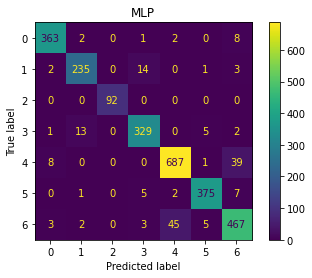

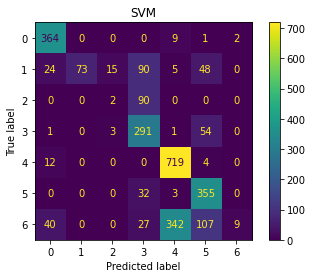

In [29]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt 

#best classifier: preprocessing Logistic Regression
mlp=MLPClassifier(activation = 'logistic', solver= 'adam', tol= 0, learning_rate = 'constant')
mlp.fit(X_train,y_train)
y1_pred = mlp.predict(X_test)
M1 = confusion_matrix(y_test, y1_pred)
plot_confusion_matrix(mlp, X_test, y_test)
plt.title("MLP")
plt.show()

#worst classifier (except from dummy):
svm = SVC(C = 0.002, kernel= 'rbf', degree= 27, gamma= 0.011)
svm.fit(X_train,y_train)
y2_pred = svm.predict(X_test)
M2 = confusion_matrix(y_test, y2_pred)
plot_confusion_matrix(svm, X_test, y_test)
plt.title("SVM")
plt.show()